In [2]:
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("heart.csv")

In [5]:
df.shape

(303, 14)

In [6]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

<Axes: >

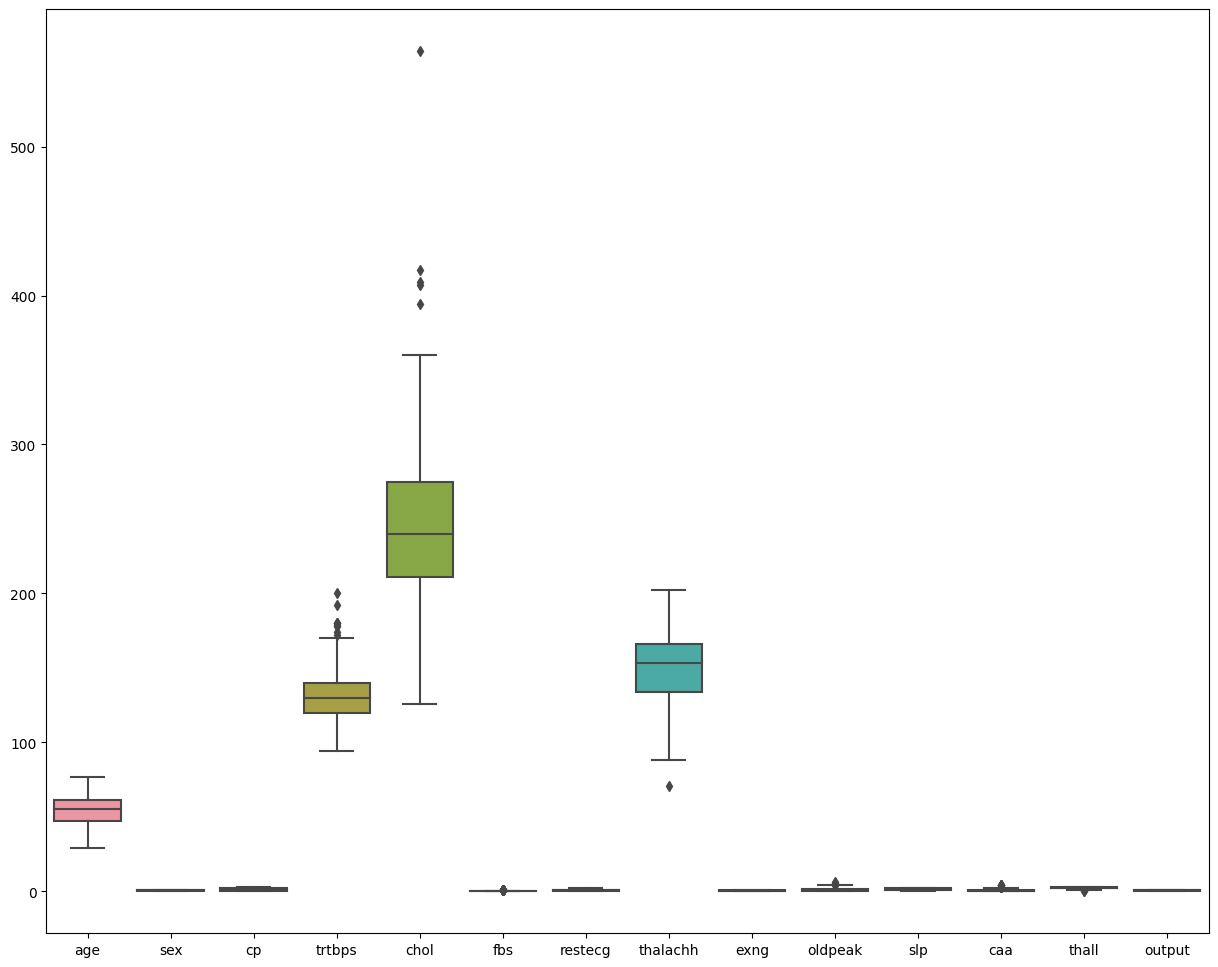

In [12]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']])

In [13]:

def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1

    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    #print("The lower & Upper Bound",lwr_bound, upr_bound)

    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list



for i in ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in age attribute : []
Outliers in sex attribute : []
Outliers in cp attribute : []
Outliers in trtbps attribute : [172, 174, 178, 178, 180, 180, 180, 192, 200]
Outliers in chol attribute : [394, 407, 409, 417, 564]
Outliers in fbs attribute : [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Outliers in restecg attribute : []
Outliers in thalachh attribute : [71]
Outliers in exng attribute : []
Outliers in oldpeak attribute : [4.2, 4.2, 4.4, 5.6, 6.2]
Outliers in slp attribute : []
Outliers in caa attribute : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4]
Outliers in thall attribute : [0, 0]
Outliers in output attribute : []


In [14]:
def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1


for i in ['trtbps', 'chol', 'fbs', 'thalachh',
       'oldpeak', 'caa', 'thall']:
    df[i]=handle_outliers(df[i])

<Axes: >

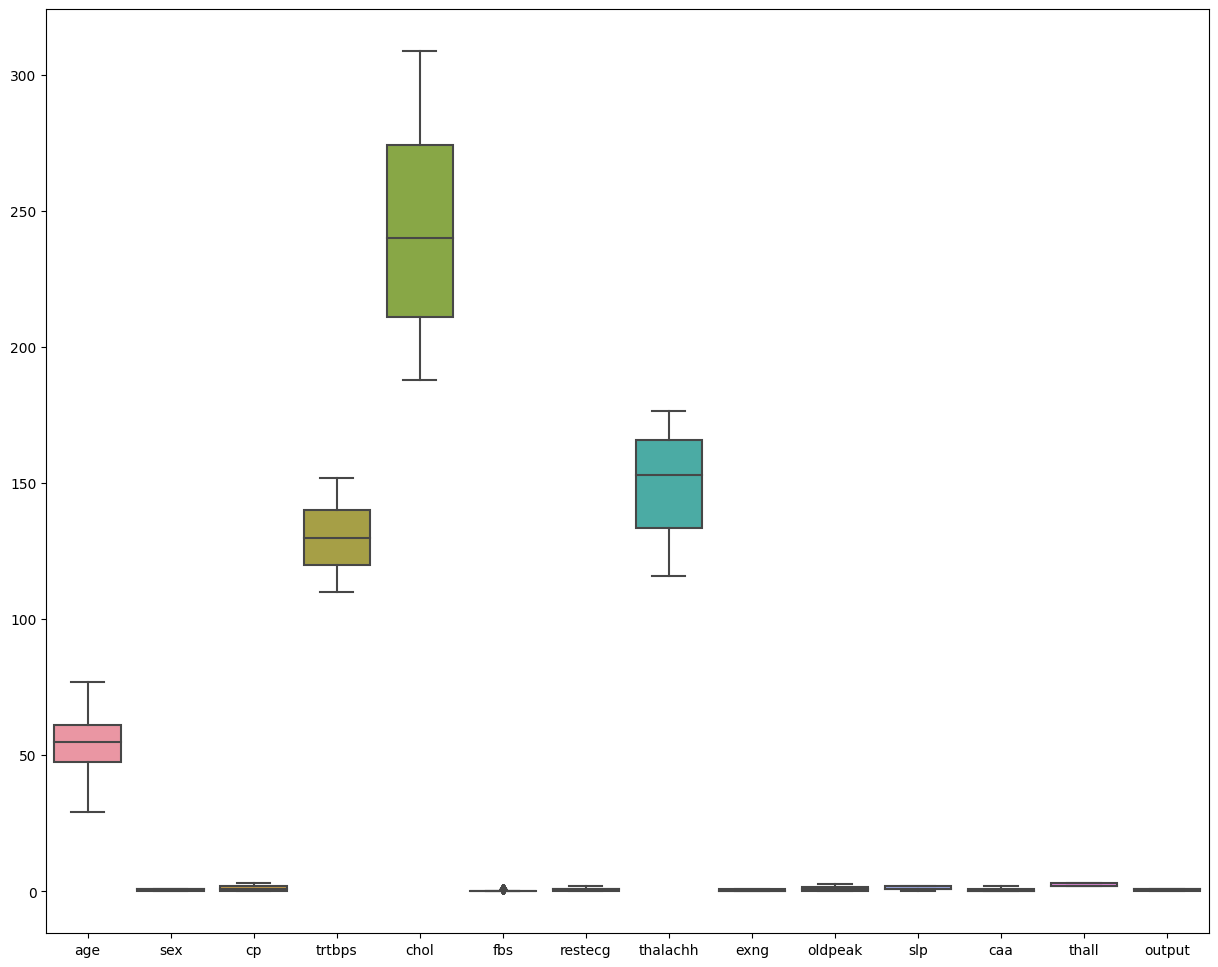

In [15]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']])

In [16]:

def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1

    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    #print("The lower & Upper Bound",lwr_bound, upr_bound)

    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list



for i in ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in age attribute : []
Outliers in sex attribute : []
Outliers in cp attribute : []
Outliers in trtbps attribute : []
Outliers in chol attribute : []
Outliers in fbs attribute : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Outliers in restecg attribute : []
Outliers in thalachh attribute : []
Outliers in exng attribute : []
Outliers in oldpeak attribute : []
Outliers in slp attribute : []
Outliers in caa attribute : []
Outliers in thall attribute : []
Outliers in output attribute : []


In [17]:
def handle_outliers(data):

    tenth_percentile = np.percentile(data, 10)
    ninetieth_percentile = np.percentile(data, 90)

    b = np.where(data<tenth_percentile, tenth_percentile, data)

    b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
    return b1


for i in ['fbs']:
    df[i]=handle_outliers(df[i])

<Axes: >

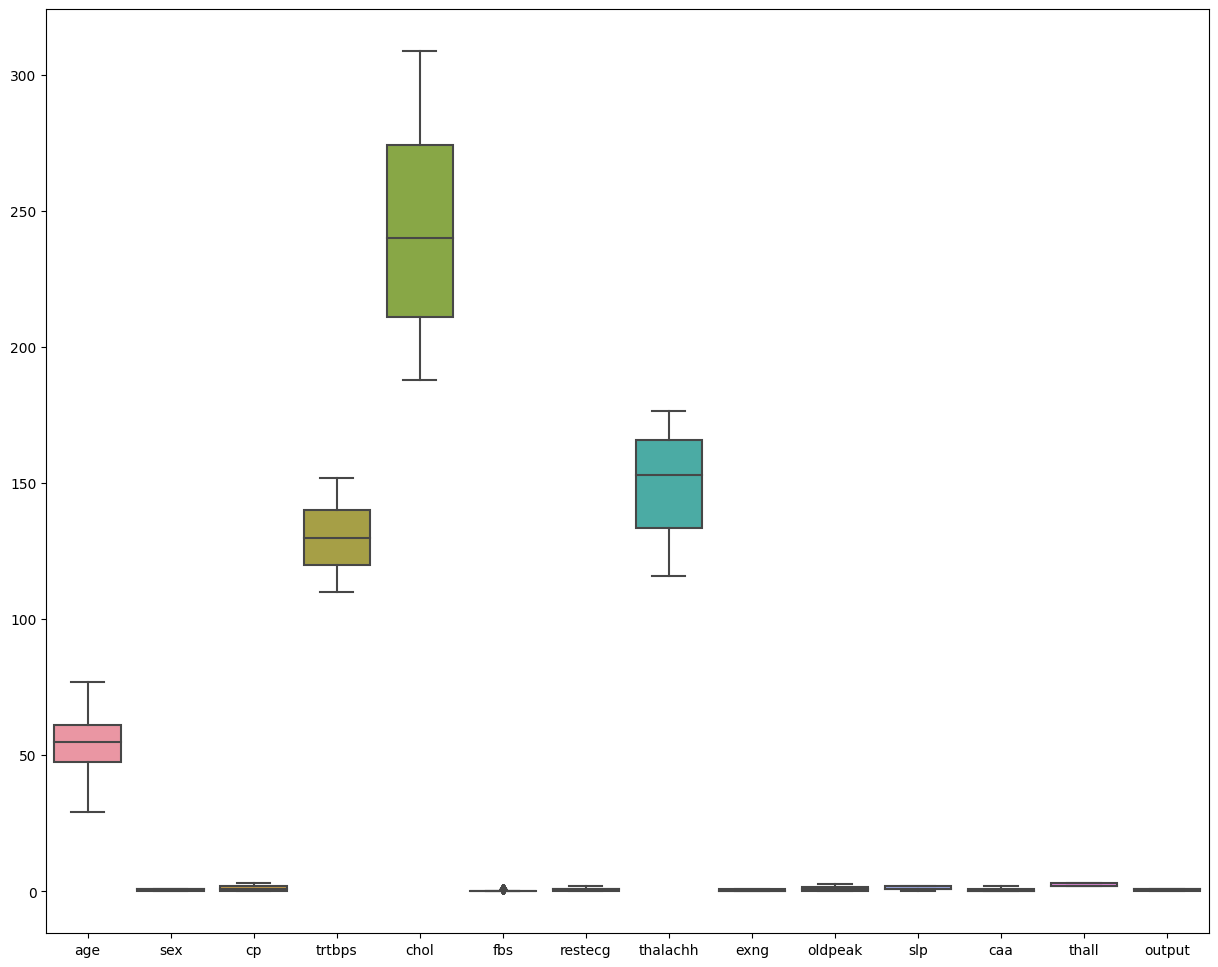

In [18]:
plt.figure(figsize=(15,12))
sns.boxplot(data=df[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']])

In [19]:

def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)

    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    #print("The Val of Q1 and Q2",q1, q3)
    IQR = q3-q1

    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    #print("The lower & Upper Bound",lwr_bound, upr_bound)

    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list



for i in ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)

Outliers in age attribute : []
Outliers in sex attribute : []
Outliers in cp attribute : []
Outliers in trtbps attribute : []
Outliers in chol attribute : []
Outliers in fbs attribute : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Outliers in restecg attribute : []
Outliers in thalachh attribute : []
Outliers in exng attribute : []
Outliers in oldpeak attribute : []
Outliers in slp attribute : []
Outliers in caa attribute : []
Outliers in thall attribute : []
Outliers in output attribute : []


Text(0.5, 1.0, 'Correlation map')

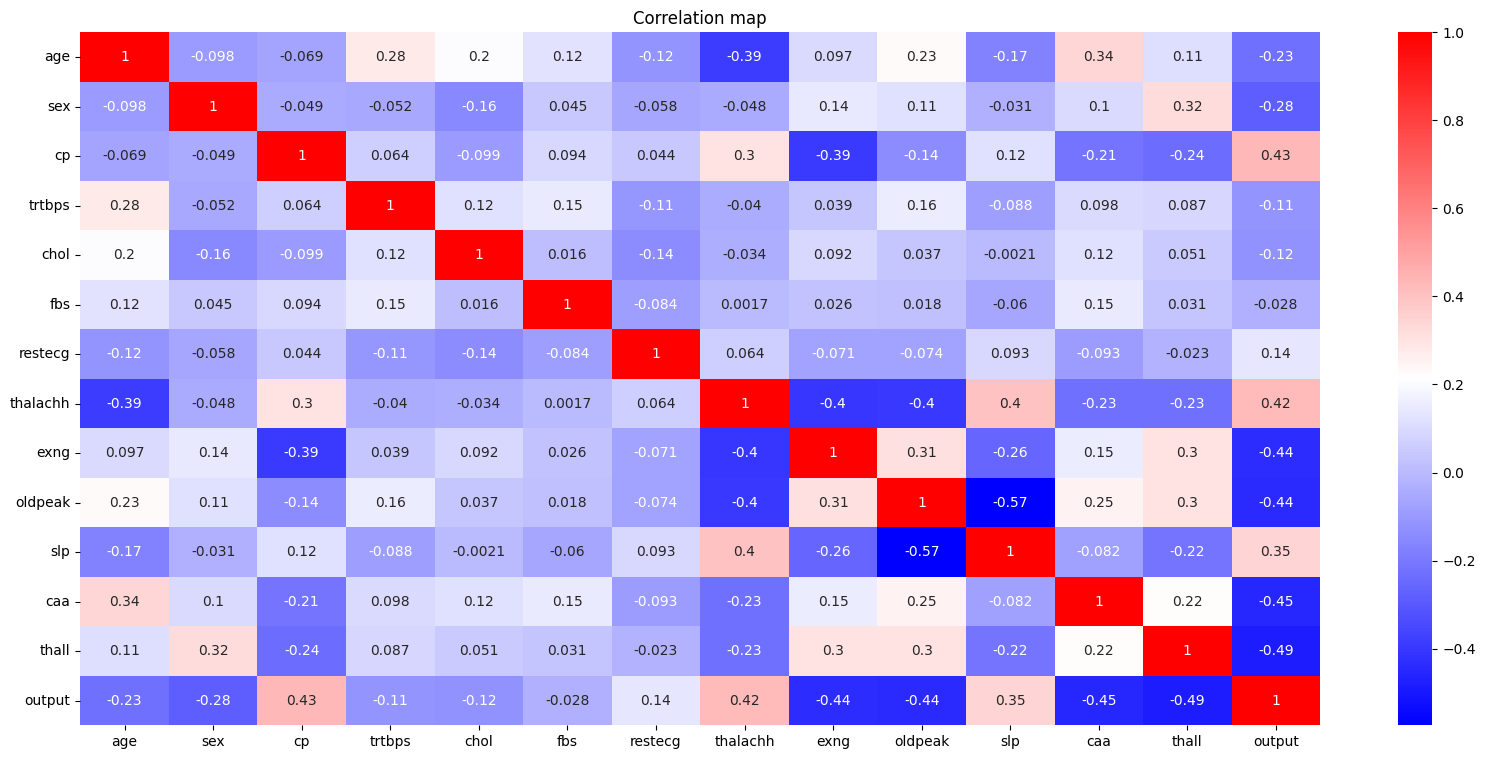

In [20]:
plt.figure(figsize=(20,9));
sns.heatmap(df.corr(),annot=True,cmap='bwr');
plt.title("Correlation map")

In [95]:
feature_cols = ['age', 'sex', 'cp', 'trtbps', 'chol', 'restecg','fbs','thalachh','exng', 'oldpeak', 'slp', 'caa', 'thall']
X = df[feature_cols]
y = df.output

In [96]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: output, Length: 303, dtype: int64

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [98]:

X_train.shape

(257, 13)

In [99]:
 X_test.shape

(46, 13)

In [102]:
from sklearn.svm import SVC
nonlinear_clf = SVC(kernel='rbf', C=2.0)
nonlinear_clf.fit(X_train,y_train)

SVC(C=2.0)

In [103]:
from sklearn.metrics import accuracy_score
y_pred = nonlinear_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.6086956521739131

In [104]:
from sklearn.svm import SVC
classifier=SVC(kernel="poly")
classifier.fit(X_train,y_train)

SVC(kernel='poly')

In [105]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.6086956521739131

In [106]:
from sklearn.svm import SVC
classifier=SVC(kernel="sigmoid")
classifier.fit(X_train,y_train)

SVC(kernel='sigmoid')

In [107]:
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.5434782608695652